**Project #2 – Computer Science Algorithms**

Background – Recursive algorithms, search algorithms, and sorting algorithms are often common
interview questions. Yes, even for data scientists! Implement either the recursive algorithm or search
algorithm prompt below.

*Recursion*

Recursion is a powerful tool and an important concept in computer science. A recursive function is one that
calls itself. A recursive function consists of two parts:

    1. The base case(s): the case(s) containing the solution to the simplest/smallest form of the problem. At this point, the solution can be stated non-recursively.
    
    2. The recursive case: the case in which the function calls itself on a simpler/smaller version of the problem.
    
If you’re confused, just remember that in order to understand recursion, you must first understand
recursion.

The mathematical concept of factorial (n! = the product of all positive integers less than or equal to n, e.g.
5! = 5*4*3*2*1 = 120) is an example of a problem that can be solved recursively. Below are example
functions that solve factorial iteratively and recursively, as well as one that compares the time it took for
your computer to solve n! using each method.

1. Walk through each algorithm (pen and paper) using n = 5 and make sure that you understand how each function works.

**Iterative Factorial - sequential for loop**

n = 5

factorial = 1

for i in range 5 to 1, step size -1

 i = 5, factorial x= n => 1 x 5 = 5, n -= 1 => 5 - 1 = 4

 i = 4, factorial x= n => 5 x 4 = 20, n -= 1 => 4 - 1 = 3

 i = 3, factorial x= n => 20 x 3 = 60, n -= 1 => 3 - 1 = 2

 i = 2, factorial x= n => 60 x 2 = 120, n -= 1 => 2 - 1 = 1

 i = 1, factorial x= n => 120 x 1 = 120, n -= 1 => 1 - 1 = 1

factorial = 120
 
**Recursive Factorial**

 n = 5

 if n<=1
    return 1 (base case)

 return n x recursive_factorial(n-1)
 
5 x recursive_factorial(4)

5 x 4 x recursive_factorial(3)

5 x 4 x 3 x recursive_factorial(2)

5 x 4 x 3 x 2 recursive_factorial(1)

5 x 4 x 3 x 2 x 1

120
 

Implementation in code of iterative vs recursive vs native python implementation of factorial calculation.

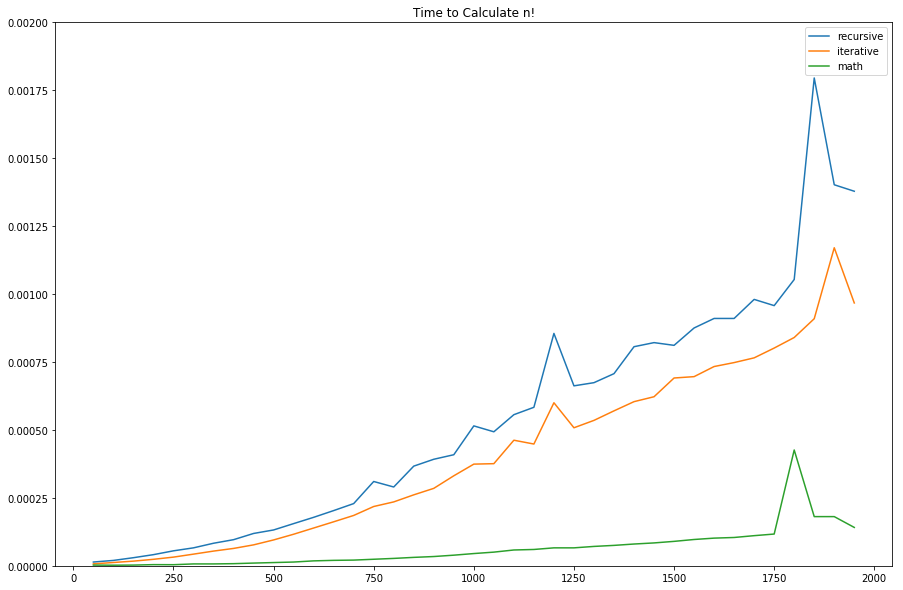

In [8]:
import time
import math
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(2000)
% matplotlib inline

# comparision of the time required for each alternative to run
def iterative_factorial(n):
    factorial = 1
    for i in range(n, 1, -1):
        factorial *= n
        n -= 1
    return factorial


def recursive_factorial(n):
    if n < 1:
        return 1
    return n * recursive_factorial(n - 1)


def factorial_compare(n, factorial_type):
    """Switch statement for mode of factorial calculation"""
    start_timestamp = time.time()

    if factorial_type == 'recursive':
        recursive_factorial(n)
    elif factorial_type == 'iterative':
        iterative_factorial(n)
    else:
        math.factorial(n)
    time_dict[factorial_type].append(time.time() - start_timestamp)


# collecting the time required to calculate the factorial via each function
factorial_types = ['recursive', 'iterative', 'math']
time_dict = {k: [] for k in factorial_types}
n_points = list(range(50, 2000, 50))

for n in n_points:
    for factorial_type in factorial_types:
        factorial_compare(n, factorial_type)

# plot each of the forms of calculating the factorial
plt.figure(figsize=(15, 10))
for k, v in time_dict.items():
    plt.plot(n_points, v, label=k)

plt.ylim(ymin=0, ymax=0.002)
plt.legend()
plt.title("Time to Calculate n!")
plt.show()

Recursion while more compact in code and perhaps more elegant, actually runs about 2x as long as iterative. Some research on google suggests that it is due to repeated function calls and stack usage. Moreover, we can exceed the limits on recursion depth if we go to range(50, 2050, 50). As expected, native python function has been optimized as part of the .math library

This code repeats the above analysis, but does it for the Fibonacci sequence. This sequence is defined as:
    $$F_n = F_{n-1} + F_{n-2}$$ 
where the sequence is seeded with either:
$$F_0=0,\ F_1=1\ \ or\ \   F_1=1,\ F_2=2$$

Do you want to start the series with 0 or 1? 0
Calculation type: Iterative
Number of iterations: 3
Next number in Fibonacci sequence: 1

Calculation type: Recursive
Number of iterations: 3
Next number in Fibonacci sequence: 1

Calculation type: Iterative
Number of iterations: 8
Next number in Fibonacci sequence: 13

Calculation type: Recursive
Number of iterations: 8
Next number in Fibonacci sequence: 13

Calculation type: Iterative
Number of iterations: 13
Next number in Fibonacci sequence: 144

Calculation type: Recursive
Number of iterations: 13
Next number in Fibonacci sequence: 144

Calculation type: Iterative
Number of iterations: 18
Next number in Fibonacci sequence: 1597

Calculation type: Recursive
Number of iterations: 18
Next number in Fibonacci sequence: 1597

Calculation type: Iterative
Number of iterations: 23
Next number in Fibonacci sequence: 17711

Calculation type: Recursive
Number of iterations: 23
Next number in Fibonacci sequence: 17711

Calculation type: Iterative

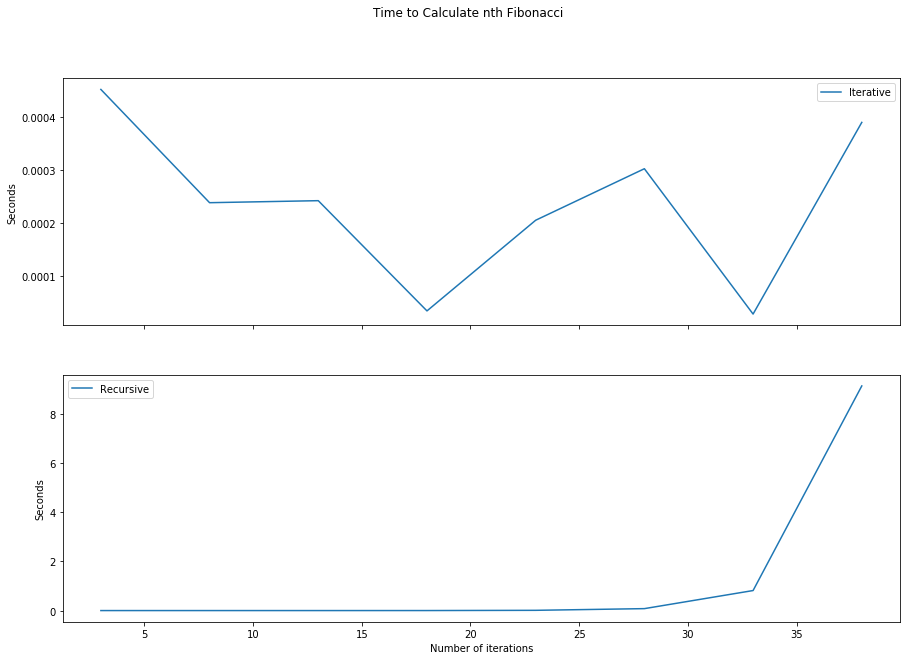

In [4]:
import time
import matplotlib.pyplot as plt
% matplotlib inline


# comparision of the time required for each alternative to run

# iterative implementation, takes number of terms and option to start with 0, 1 or 1, 1
# original definition historically starts with 1, 1, but more modern usage starts with 0, 1, default is 0, 1
# 0 uses 0, 1; 1 uses 1, 1
def iterative_fibonacci(n, start):
    ultimate_term = 1
    
    # requesting modern fibonacci (0,1,1,2,3,5...)
    if start == 0:
        penultimate_term = 0
        start_index_modifier = 3
    # requesting historic fibonacci (1,1,2,3,5...)
    else:
        penultimate_term = 1
        start_index_modifier = 2

    for i in range(start + start_index_modifier, n + 1):
        next_term = ultimate_term + penultimate_term
        penultimate_term = ultimate_term
        ultimate_term = next_term
    return next_term


def recursive_fibonacci(n, start):
    current_term = 0
    # Conditionally differentiating modern and historic sequences
    start_index_modifier = 3 if start == 0 else 2

    if n <= start_index_modifier:
        current_term = current_term + 1 + 0
        return current_term
    current_term = recursive_fibonacci(n - 1, start) + recursive_fibonacci(n - 2, start)
    return current_term


def fibonacci_compare(n, start, fib_type):
    """Calculates Fibonacci sequence and appends calculation time to the fib_type key in time_dict"""
    start_timestamp = time.time()

    if fib_type == 'Iterative':
        print(f"Calculation type: {fib_type}\n"
              f"Number of iterations: {n}\n"
              f"Next number in Fibonacci sequence: {iterative_fibonacci(n, start)}\n")
    else:
        print(f"Calculation type: {fib_type}\n"
              f"Number of iterations: {n}\n"
              f"Next number in Fibonacci sequence: {recursive_fibonacci(n, start)}\n")
    time_dict[fib_type].append(time.time() - start_timestamp)


# User input regarding starting number
start_number = -1
while (start_number != 1) and (start_number != 0):
    start_number = int(input("Do you want to start the series with 0 or 1? "))

# Arrays & maps for determining method parameters and plotting
n_points = list(range(3, 43, 5))
fibonacci_types = ['Iterative', 'Recursive']
time_dict = {k: [] for k in fibonacci_types}

for n in n_points:
    for fibonacci_type in fibonacci_types:
        fibonacci_compare(n, start_number, fibonacci_type)

# Plotting via iterating through time_dict and applying to subplot axes
f, axes = plt.subplots(2, sharex=True, figsize=(15,10))
for k, v in time_dict.items():
    axis_index = fibonacci_types.index(k)
    axes[axis_index].plot(n_points, v, label=k)
    axes[axis_index].set_ylabel('Seconds')
    axes[axis_index].legend()

axes[1].set_xlabel('Number of iterations')
f.suptitle("Time to Calculate nth Fibonacci")
plt.show()